# CS4035 - Cyber Data Analytics
## Lab 1 - Fraud data

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 1 contains 5 main questions, including the bonus. Write the code or explanation below each sub question. For the explanations, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) The libraries needed to run this file. Except for numpy, scikit-learn, pandas, matplotlib

Your peers should be able to use the readme section for instructions and be able to run this file. 

Make sure to keep your answers concise. Maximum number of words is 1000, which you can count with the code below. (You can add around 600 words since we start at around 400).

In [2]:
# If this cell does not work try running `pip install nbformat`

import io
from IPython import nbformat

nb = nbformat.read("Lab1-2021.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

/home/raphael/.local/lib/python3.6/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


Word count: 373


## Group Number :

## Student 1 
### Name : Yuan Tian
### ID :

## Student 2
### Name : Raphael Frühwirth
### ID : 5897297

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [23]:
import pandas as pd

def process_df(df):
  exchange_rates = {
        'USD': 1.0,
        'GBP': 1.42,
        'AUD': 0.73,
        'SEK': 0.12,
        'MXN': 0.049,
        'NZD': 0.65
        }

  def normalize_amount(row):
      currency_code = row['currencycode']
      amount = row['amount']
      exchange_rate = exchange_rates[currency_code]
      return amount * exchange_rate

  df['amount'] = df.apply(normalize_amount, axis=1)
  df['accountcode'] = df['accountcode'].astype('category').cat.codes
  df['txvariantcode'] = df['txvariantcode'].astype('category').cat.codes
  df['issuercountrycode'] = df['issuercountrycode'].astype('category').cat.codes
  df['currencycode'] = df['currencycode'].astype('category').cat.codes
  df['shoppercountrycode'] = df['shoppercountrycode'].astype('category').cat.codes
  df['shopperinteraction'] = df['shopperinteraction'].astype('category').cat.codes
  df['cardverificationcodesupplied'] = df['cardverificationcodesupplied'].astype('category').cat.codes

  df['mail_id'] = df['mail_id'].astype('category').cat.codes
  df['ip_id'] = df['ip_id'].astype('category').cat.codes
  df['card_id'] = df['card_id'].astype('category').cat.codes

  df.to_csv("cda-lab-1-credit-card-fraud/processed.csv", index=False)
  
  return df

## 1. Visualization task – 1 A4

### 1a. Plot visulations 

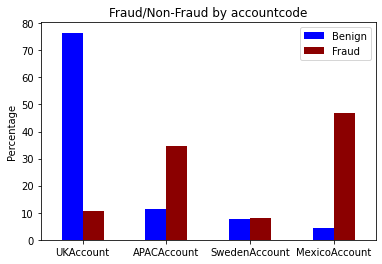

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("cda-lab-1-credit-card-fraud/train_data.csv")
index = "accountcode"
top = 5
transactions = df[index].value_counts()[:top]
frauds = df.groupby(index)['label'].sum()

df['label'] = df['label'].replace({0: 1, 1: 0})
benign = df.groupby(index)['label'].sum()

frauds = (100. * frauds / frauds.sum()).round(1)
transactions = (100. * transactions / transactions.sum()).round(1)
benign = (100. * benign/benign.sum()).round(1)

df_viz = pd.DataFrame({"Benign": benign, "Fraud": frauds}, index=df[index].unique()[:top])
ax = df_viz.plot.bar(rot=0, color=["blue", "darkred"])
plt.ylabel("Percentage")
plt.title(f"Fraud/Non-Fraud by {index}")
plt.savefig(f"figures/figure_{index}.png", transparent=False, format="png", facecolor="white")


   Id  issuercountrycode  txvariantcode       bin   amount  currencycode  \
0   1                 38              2  546097.0   6390.0             1   
1   2                 38              3  557349.0   4820.9             1   
2   3                 38              2  542011.0   5530.9             1   
3   4                 38              8  465943.0  21789.9             1   
4   6                 38              8  475127.0   7234.9             1   

   shoppercountrycode  shopperinteraction  cardverificationcodesupplied  \
0                  46                   1                             1   
1                  46                   1                             1   
2                  46                   1                             1   
3                  46                   0                             0   
4                  46                   1                             1   

   cvcresponsecode  accountcode  mail_id   ip_id  card_id  label  
0                1       

<AxesSubplot:>

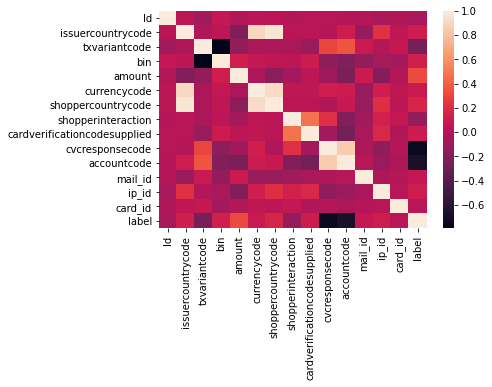

In [26]:
df = pd.read_csv("cda-lab-1-credit-card-fraud/train_data.csv")
df = process_df(df)
print(df.head())
num = len(df[df["label"]==1])
non_fraud = df[df["label"] == 0].sample(num, random_state=12)
fraud = df[df["label"] == 1].sample(num, random_state=12)

corr_mat = pd.concat([non_fraud, fraud]).corr()
sns.heatmap(corr_mat)

### 1b. Describe the visualizations and provide relavant explanations of features and relations.

## 2. Imbalance task – 1 A4 – Individual

### 2a. Print ROC curves

### 2b. Analyse the performance of the classifiers. Explain which method performs best.

### 2c. Is using SMOTE a good idea? Why (not)?

## 3. Privacy task – 1 A4 – Individual

### 3a. Print ROC curves

### 3b. Analyse the performance of the classifiers. Explain which method performs best.

### 3c. Can you explain the performance difference for the different classifiers? Is it advisable to protect people’s privacy using rank-swapping? Why (not)?

## 4. Classification task – 2 A4

### 4a. Print relevant plots and metrics with clear headings.

### 4b. Explain the applied data pre-processing steps, learning algorithms, and post-processing steps or ensemble methods. Compare the performance of the two algorithms, focusing on performance criteria that are relevant in practice, use 10-fold cross-validation.

## 5. Bonus task – 1 A4

### 5a. Provide code and report below